In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

In [3]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df['label'] = df['Zone 1 Power Consumption'] > df['Zone 1 Power Consumption'].mean()

In [5]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,label
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,True
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,False
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,False
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,False
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,False


In [6]:
df['prediction'] = False

In [7]:
(df['label'] == df['prediction']).sum() / len(df)

0.5040254884004884

In [8]:
df['prediction'] = df['Temperature'] > df['Temperature'].median()

In [9]:
(df['label'] == df['prediction']).sum() / len(df)

0.6372863247863247

# Gini Impurity

In [10]:
def gini(class0_count, class1_count):
    n = class0_count + class1_count
    return 2 * (class0_count / n) * (class1_count / n)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
impurity = [gini(c, 100 - c) for c in range(101)]

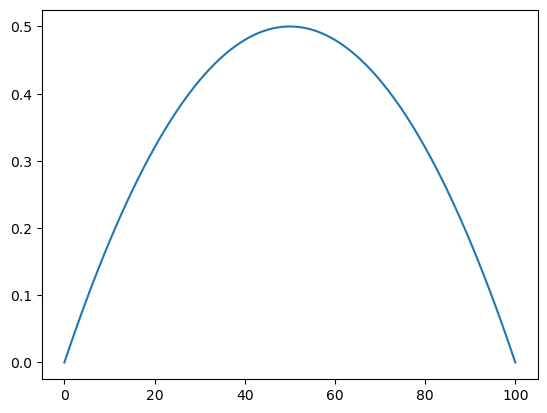

In [13]:
plt.plot(np.linspace(0, 100, 101), impurity)

In [14]:
class0_count = (df['label'] == False).sum()
class1_count = (df['label'] == True).sum()

In [15]:
gini(class0_count, class1_count)

0.4999675908862751

In [16]:
pred_pos = df[df['prediction'] == True]
pred_neg = df[df['prediction'] == False]

pred_pos_gini = gini((pred_pos['label'] == False).sum(), (pred_pos['label'] == True).sum())
pred_neg_gini = gini((pred_neg['label'] == False).sum(), (pred_neg['label'] == True).sum())

In [17]:
avg_gini = (pred_pos_gini * len(pred_pos) + pred_neg_gini * (len(pred_neg))) / (len(pred_pos) + len(pred_neg))

In [18]:
avg_gini

0.4622729413036917

## Learning the cutoff from data

In [19]:
cutoffs = sorted(df['Temperature'].unique())[:-1]

In [20]:
best_gini = 1
best_cutoff = -1 

for cutoff in cutoffs:
    df['prediction'] = df['Temperature'] > cutoff
    pred_pos = df[df['prediction'] == True]
    pred_neg = df[df['prediction'] == False]
    
    pred_pos_gini = gini((pred_pos['label'] == False).sum(), (pred_pos['label'] == True).sum())
    pred_neg_gini = gini((pred_neg['label'] == False).sum(), (pred_neg['label'] == True).sum())
    avg_gini = (pred_pos_gini * len(pred_pos) + pred_neg_gini * (len(pred_neg))) / (len(pred_pos) + len(pred_neg))
    
    if avg_gini < best_gini:
        best_gini = avg_gini
        best_cutoff = cutoff

print('Best gini impurity: ', best_gini)
print('Best cutoff: ', best_cutoff)

Best gini impurity:  0.4501235238876726
Best cutoff:  21.58


# Use humidity instead of temp

In [21]:
for attribute_name in ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']:

    cutoffs = sorted(df[attribute_name].unique())[:-1]

    best_gini = 1
    best_cutoff = -1
    for cutoff in cutoffs:
        df['prediction'] = df[attribute_name] > cutoff
        pred_pos = df[df['prediction'] == True]
        pred_neg = df[df['prediction'] == False]

        pred_pos_gini = gini((pred_pos['label'] == False).sum(), (pred_pos['label'] == True).sum())
        pred_neg_gini = gini((pred_neg['label'] == False).sum(), (pred_neg['label'] == True).sum())
        tmp_var = (pred_pos_gini * len(pred_pos) + pred_neg_gini * len(pred_neg))
        avg_gini = tmp_var / (len(pred_pos) + len(pred_neg))

        if avg_gini < best_gini:
            best_gini = avg_gini
            best_cutoff = cutoff

    print(f'Best gini impurity for {attribute_name}:', best_gini)
    print(f'Best cutoff for {attribute_name}:', best_cutoff)

Best gini impurity for Temperature: 0.4501235238876726
Best cutoff for Temperature: 21.58
Best gini impurity for Humidity: 0.47317378630154044
Best cutoff for Humidity: 79.5
Best gini impurity for Wind Speed: 0.4917954678458401
Best cutoff for Wind Speed: 4.919
Best gini impurity for general diffuse flows: 0.4666038619644762
Best cutoff for general diffuse flows: 543.9
Best gini impurity for diffuse flows: 0.4759928651754099
Best cutoff for diffuse flows: 37.18


## Sklearn decision tree

In [22]:
#shuffle the data
df = df.sample(frac=1)

In [23]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,label,prediction
36801,9/13/2017 13:30,25.60,52.25,0.276,405.400,214.300,38835.39823,24713.51351,15556.118490,True,False
4310,1/30/2017 22:20,16.39,77.60,4.915,0.040,0.137,39202.02532,24127.65957,24167.710840,True,False
24068,6/17/2017 3:20,19.70,84.80,0.065,0.044,0.126,35081.32450,21540.12474,21415.384620,True,False
49272,12/9/2017 4:00,7.48,84.30,0.084,0.048,0.193,20933.84030,16830.92973,9680.672269,False,False
13993,4/8/2017 4:10,13.44,90.30,0.069,0.066,0.182,24180.83961,12020.77393,15936.000000,False,False


In [24]:
#split the data
train_df = df.iloc[:45000]
test_df = df.iloc[45000:]

In [25]:
features = ['Temperature']
train_X = train_df[features]
train_Y = train_df['label']
test_X = test_df[features]
test_Y = test_df['label']

In [26]:
from sklearn import tree

In [27]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 15000)
model.fit(train_X, train_Y)

DecisionTreeClassifier(min_samples_leaf=15000)

[Text(0.5, 0.75, 'Temperature <= 21.265\ngini = 0.5\nsamples = 45000\nvalue = [22709, 22291]'),
 Text(0.25, 0.25, 'gini = 0.472\nsamples = 29786\nvalue = [18392, 11394]'),
 Text(0.75, 0.25, 'gini = 0.406\nsamples = 15214\nvalue = [4317, 10897]')]

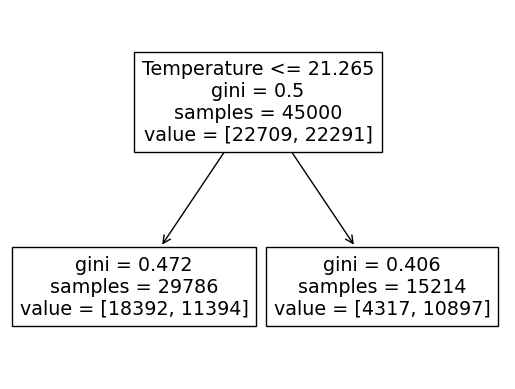

In [28]:
tree.plot_tree(model, feature_names = features)

## Multiple Features

In [29]:
features = ['Temperature', 'Humidity', 'Wind Speed']
train_X = train_df[features]
train_Y = train_df['label']
test_X = test_df[features]
test_Y = test_df['label']

[Text(0.5, 0.75, 'Temperature <= 21.265\ngini = 0.5\nsamples = 45000\nvalue = [22709, 22291]'),
 Text(0.25, 0.25, 'gini = 0.472\nsamples = 29786\nvalue = [18392, 11394]'),
 Text(0.75, 0.25, 'gini = 0.406\nsamples = 15214\nvalue = [4317, 10897]')]

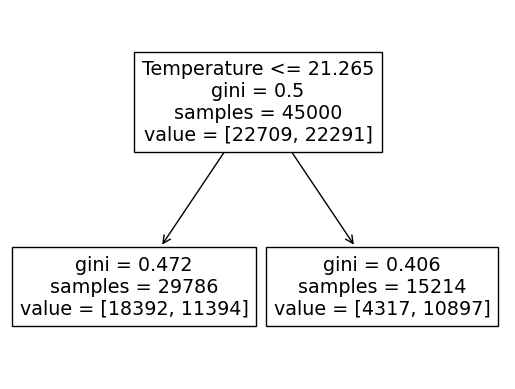

In [30]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 15000)
model.fit(train_X, train_Y)
tree.plot_tree(model, feature_names = features)

[Text(0.6666666666666666, 0.875, 'Temperature <= 21.575\ngini = 0.5\nsamples = 45000\nvalue = [22709, 22291]'),
 Text(0.5, 0.625, 'Humidity <= 80.45\ngini = 0.474\nsamples = 30621\nvalue = [18770, 11851]'),
 Text(0.3333333333333333, 0.375, 'Temperature <= 16.225\ngini = 0.495\nsamples = 20465\nvalue = [11265, 9200]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.488\nsamples = 10369\nvalue = [5994, 4375]'),
 Text(0.5, 0.125, 'gini = 0.499\nsamples = 10096\nvalue = [5271, 4825]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.386\nsamples = 10156\nvalue = [7505, 2651]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.398\nsamples = 14379\nvalue = [3939, 10440]')]

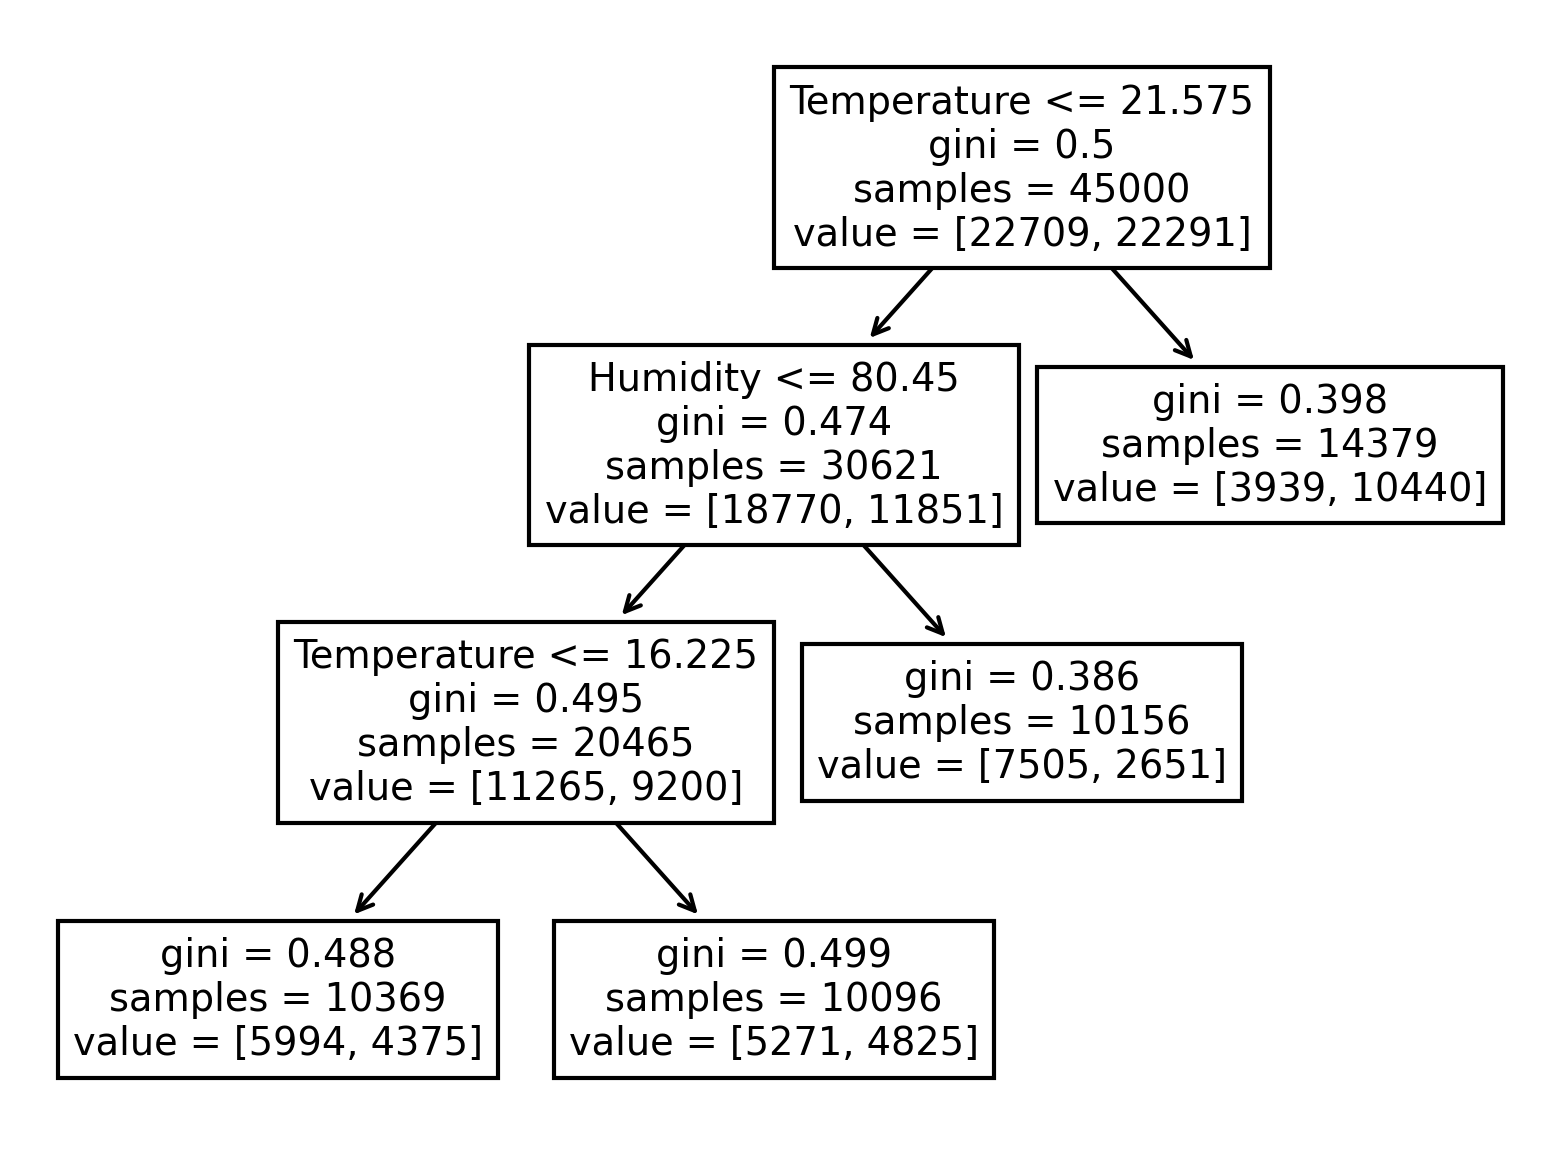

In [31]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 10000)
model.fit(train_X, train_Y)

plt.figure(dpi = 300)
tree.plot_tree(model, feature_names = features)

### Evaluation

In [32]:
from sklearn import metrics

In [43]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 10000)
model.fit(train_X, train_Y)

train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

train_kappa = metrics.cohen_kappa_score(train_Y, train_pred)
test_kappa = metrics.cohen_kappa_score(test_Y, test_pred)

print('Training kappa: ', train_kappa)
print('Testing kappa: ', test_kappa)

Training kappa:  0.29586147838575383
Testing kappa:  0.2916646782973662


In [44]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 10)
model.fit(train_X, train_Y)

train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

train_kappa = metrics.cohen_kappa_score(train_Y, train_pred)
test_kappa = metrics.cohen_kappa_score(test_Y, test_pred)

print('Training kappa: ', train_kappa)
print('Testing kappa: ', test_kappa)

Training kappa:  0.6417928054460653
Testing kappa:  0.436077498006779


In [45]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 100)
model.fit(train_X, train_Y)

train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

train_kappa = metrics.cohen_kappa_score(train_Y, train_pred)
test_kappa = metrics.cohen_kappa_score(test_Y, test_pred)

print('Training kappa: ', train_kappa)
print('Testing kappa: ', test_kappa)

Training kappa:  0.4588910396356801
Testing kappa:  0.40585662310049897


In [46]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 20)
model.fit(train_X, train_Y)

train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

train_kappa = metrics.cohen_kappa_score(train_Y, train_pred)
test_kappa = metrics.cohen_kappa_score(test_Y, test_pred)

print('Training kappa: ', train_kappa)
print('Testing kappa: ', test_kappa)

Training kappa:  0.5711463654721163
Testing kappa:  0.4309484977217226


In [57]:
params = ([10000, 1000, 500, 100, 50, 20, 15, 10, 5, 1])[::-1]
train_kappas = []
test_kappas = []

for min_samples_leaf in params:
    model = tree.DecisionTreeClassifier(min_samples_leaf = min_samples_leaf)
    model.fit(train_X, train_Y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)

    train_kappa = metrics.cohen_kappa_score(train_Y, train_pred)
    test_kappa = metrics.cohen_kappa_score(test_Y, test_pred)
    
    train_kappas.append(train_kappa)
    test_kappas.append(test_kappa)

In [58]:
import matplotlib.pyplot as plt

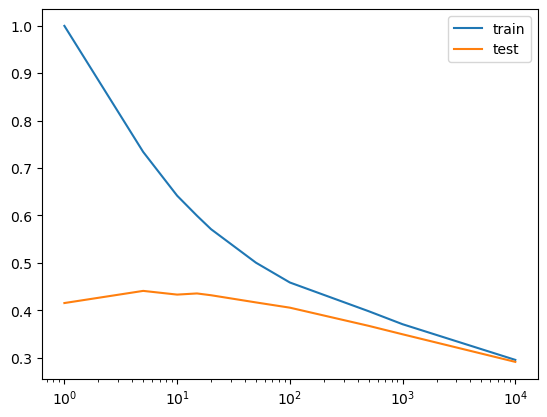

In [61]:
plt.figure(dpi = 100)
plt.semilogx(params, train_kappas, label = 'train')
plt.semilogx(params, test_kappas, label = 'test')
plt.legend()

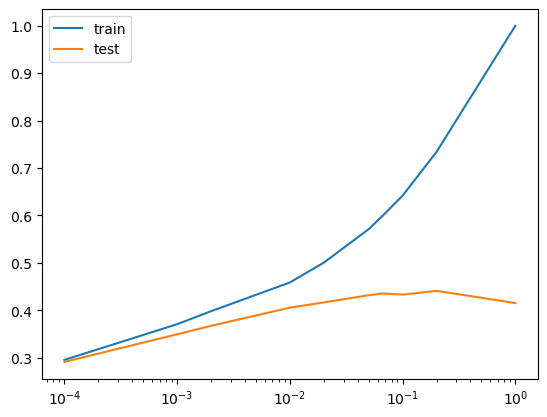

In [62]:
import numpy as np
plt.figure(dpi = 100)
plt.semilogx(1/np.array(params), train_kappas, label = 'train')
plt.semilogx(1/np.array(params), test_kappas, label = 'test')
plt.legend()

### Visualize the decision boundary

In [63]:
features = ['Temperature', 'Humidity']
train_X = train_df[features]
train_Y = train_df['label']
test_X = test_df[features]
test_Y = test_df['label']

In [64]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 20)
model.fit(train_X, train_Y)

DecisionTreeClassifier(min_samples_leaf=20)

In [65]:
ts = []
hs = []
for t in np.arange(3.24, 40, .5):
    for h in np.arange(11.3, 94.8, .5):
        ts.append(t)
        hs.append(h)
        
grid_df = pd.DataFrame({'Temperature' : ts, 'Humidity' : hs})

grid_pred = model.predict(grid_df)

In [66]:
colors = []
for p in grid_pred:
    colors.append('C' +str(int(p)))

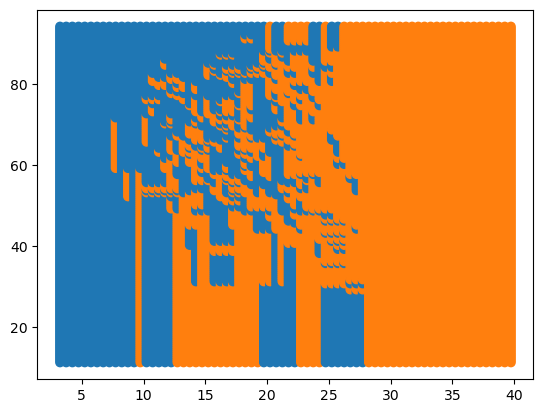

In [67]:
plt.scatter(ts, hs, c = colors)

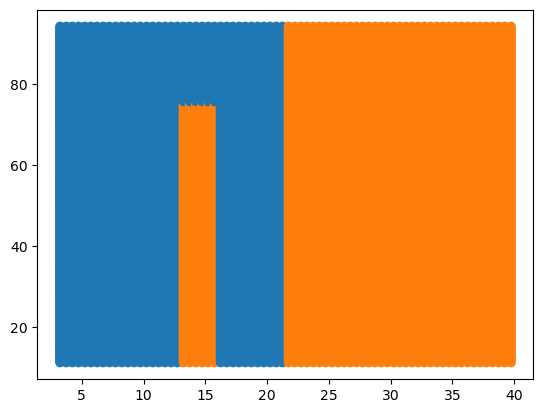

In [69]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 5000)
model.fit(train_X, train_Y)

grid_pred = model.predict(grid_df)

colors = []
for p in grid_pred:
    colors.append('C' +str(int(p)))
    
plt.scatter(ts, hs, c = colors)

### Stopping criterion

In [71]:
features = ['Temperature', 'Humidity', 'Wind Speed']
train_df = df.iloc[:20]
train_X = train_df[features]
train_Y = train_df['label']

[Text(0.375, 0.9285714285714286, 'Humidity <= 85.0\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.25, 0.7857142857142857, 'Temperature <= 8.49\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.125, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.6428571428571429, 'Wind Speed <= 0.079\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5, 0.5, 'Wind Speed <= 0.17\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.375, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.35714285714285715, 'Humidity <= 61.01\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.21428571428571427, 'Wind Speed <= 4.911\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.625, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.07142857142857142, 'gini = 0.0\n

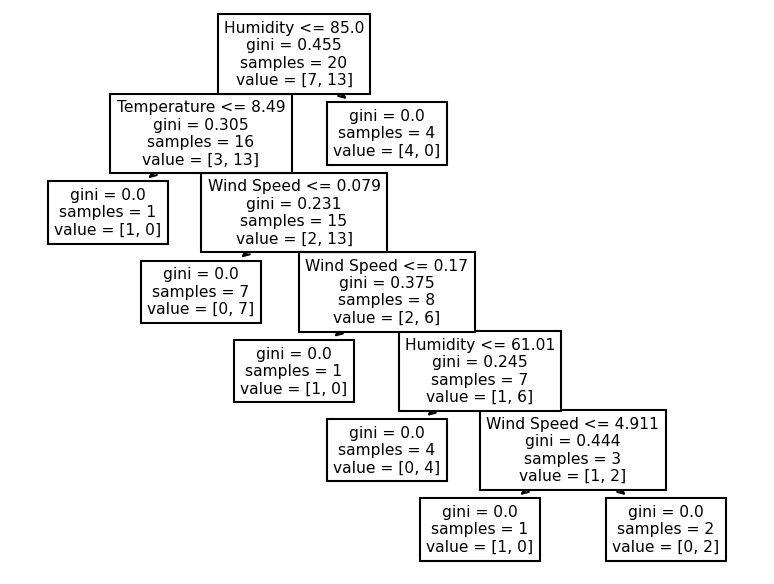

In [77]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 1)
model.fit(train_X, train_Y)

plt.figure(dpi = 150)
tree.plot_tree(model, feature_names = features)

[Text(0.5, 0.9, 'Humidity <= 85.0\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.3333333333333333, 0.7, 'Wind Speed <= 0.079\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5, 0.5, 'Wind Speed <= 0.172\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.3, 'Wind Speed <= 4.911\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

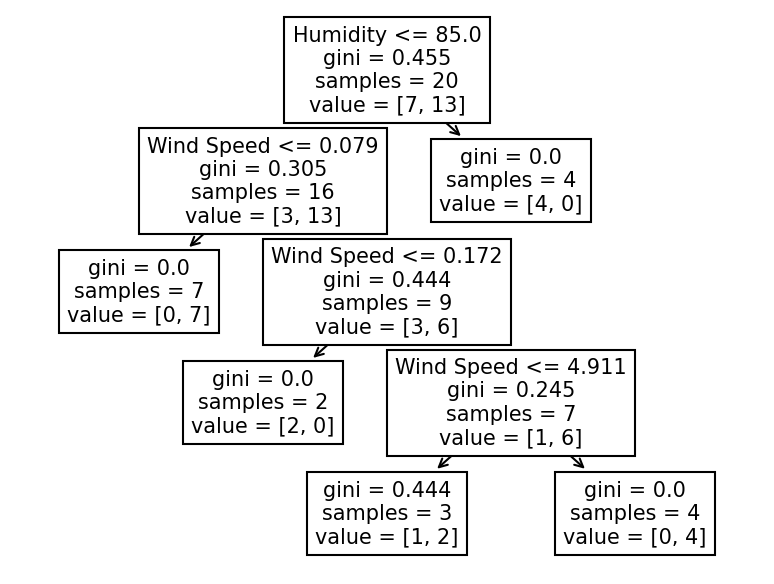

In [79]:
model = tree.DecisionTreeClassifier(min_samples_leaf = 2)
model.fit(train_X, train_Y)

plt.figure(dpi = 150)
tree.plot_tree(model, feature_names = features)